In [1]:
import networkx as nx

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import snap

In [4]:
FIn = snap.TFIn("subGraph.graph")
G = snap.TNGraph.Load(FIn)
del FIn

In [32]:
subG=nx.DiGraph()
subG.add_edges_from([(i.GetSrcNId(),i.GetDstNId()) for i in G.Edges()])

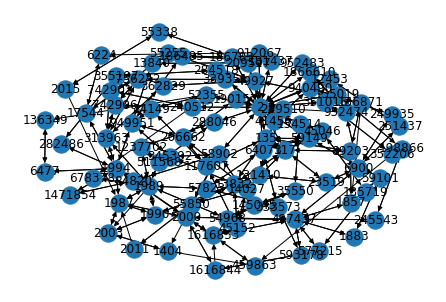

In [6]:
nx.draw_kamada_kawai(subG,with_labels=True)

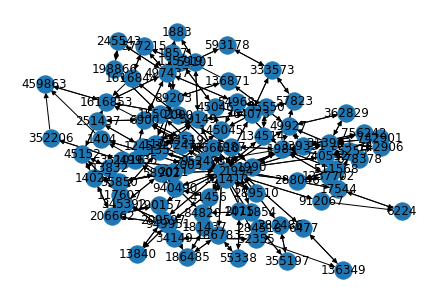

In [7]:
nx.draw(subG,with_labels=True)

In [8]:
def BFS(G,v,reverse=False):
    q=[]
    s={i.GetId():-1 for i in G.Nodes()}
    q.append(v)
    s[v]=0
    for i in q:
        if reverse:
            for j in G.GetNI(i).GetInEdges():
                if s[j]<0:
                    s[j]=s[i]+1
                    q.append(j)
        else:
            for j in G.GetNI(i).GetOutEdges():
                if s[j]<0:
                    s[j]=s[i]+1
                    q.append(j)
    return s

In [9]:
s=2
t=2000
k=5

In [10]:
ls=BFS(G,s)

In [11]:
lt=BFS(G,t,True)

In [12]:
def randomWalk_Naive(G,s,reverse=False,p=None,maxT=20,varepsilon=0.005,alpha=0.1):
    if p==None:
        p={i.GetId():0 for i in G.Nodes()}
        p[s]=1
    for T in range(maxT):
        tp={i.GetId():0 for i in G.Nodes()}
        for j in p:
            tp[s]+=p[j]*alpha
            node=G.GetNI(j)
            if not reverse:
                for k in node.GetOutEdges():
                    tp[k]+=p[j]*(1-alpha)/node.GetOutDeg()
            else:
                for k in node.GetInEdges():
                    tp[k]+=p[j]*(1-alpha)/node.GetInDeg()
        p=tp
    return p

In [13]:
def randomWalk_Prob(G,s,k,reverse=False,p=None):
    if p==None:
        p={i.GetId():0 for i in G.Nodes()}
    for T in range(k):
        p[s]+=1/k
        tp={i.GetId():0 for i in G.Nodes()}
        for j in p:
            node=G.GetNI(j)
            if not reverse:
                for k in node.GetOutEdges():
                    tp[k]+=p[j]/node.GetOutDeg()
            else:
                for k in node.GetInEdges():
                    tp[k]+=p[j]/node.GetInDeg()
        p=tp
    return p

In [51]:
def randomWalk_withPotential(G,s,k,pot,reverse=False,p=None):
    if p==None:
        p={i.GetId():0 for i in G.Nodes()}
    for T in range(k):
        p[s]+=1/k
        tp={i.GetId():0 for i in G.Nodes()}
        for j in p:
            node=G.GetNI(j)
            if not reverse:
                partition=sum([np.exp(pot[j]-pot[k]) for k in node.GetOutEdges()])
                for k in node.GetOutEdges():
                    tp[k]+=p[j]*np.exp(pot[j]-pot[k])/partition
            else:
                partition=sum([np.exp(pot[k]-pot[j]) for k in node.GetInEdges()])
                for k in node.GetInEdges():
                    tp[k]+=p[j]*np.exp(pot[k]-pot[j])/partition
        p=tp
    return p

In [15]:
ps=randomWalk_Naive(G,s)

In [16]:
pt=randomWalk_Naive(G,t,reverse=True)

In [17]:
pps=randomWalk_Prob(G,s,k)
ppt=randomWalk_Prob(G,t,k,reverse=True)

In [18]:
ppps=randomWalk_withPotential(G,s,k,{i:ls[i]+lt[i] for i in ls})
pppt=randomWalk_withPotential(G,t,k,{i:ls[i]+lt[i] for i in ls},reverse=True)

In [19]:
gx=subG.copy()

In [20]:
layout=nx.drawing.layout.kamada_kawai_layout(subG)

In [21]:
def drawNodeWeight(G,value,layout):
    nodelist=[]
    nodecolor=[]
    m=max(value)
    for node in gx:
        nodelist.append(node)
        nodecolor.append(value[node]/m)
    nx.draw(gx,pos=layout,nodelist=nodelist,node_color=nodecolor,width=10)

In [22]:
nodelist=[i for i in pps]

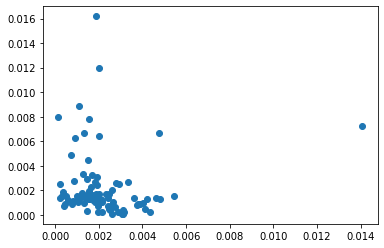

In [23]:
plt.scatter([pps[i] for i in nodelist],[ppt[i] for i in nodelist])

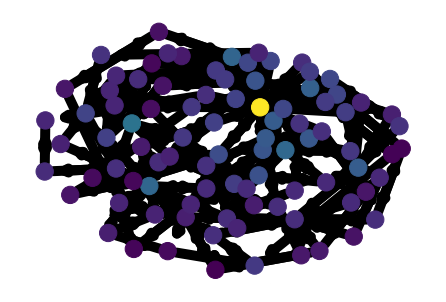

In [24]:
drawNodeWeight(subG,pps,layout)

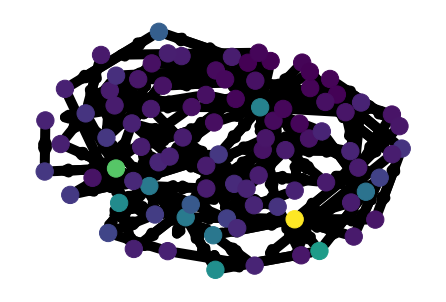

In [25]:
drawNodeWeight(subG,ppt,layout)

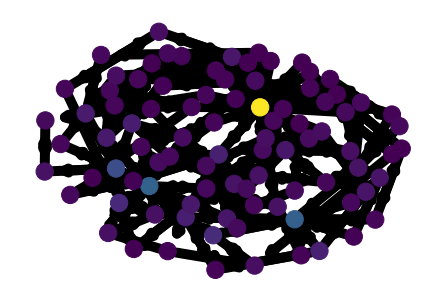

In [26]:
drawNodeWeight(subG,{i:pps[i]*ppt[i] for i in pps},layout)

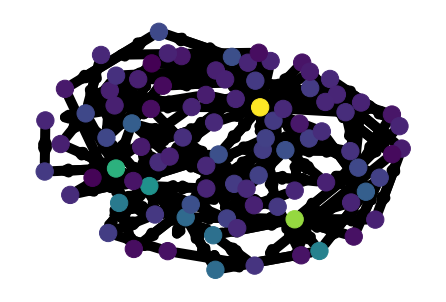

In [27]:
drawNodeWeight(subG,{i:pps[i]+ppt[i] for i in pps},layout)

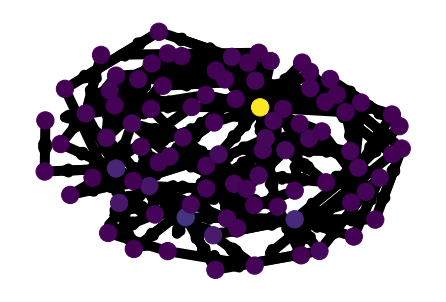

In [28]:
drawNodeWeight(subG,{i:ps[i]*pt[i] for i in ps},layout)

In [62]:
val={i:pps[i]*ppt[i] for i in pps}.values()

(array([42., 24., 12.,  3.,  4.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([2.02118370e-07, 2.23411889e-06, 4.26611941e-06, 6.29811993e-06,
        8.33012046e-06, 1.03621210e-05, 1.23941215e-05, 1.44261220e-05,
        1.64581225e-05, 1.84901231e-05, 2.05221236e-05, 2.25541241e-05,
        2.45861246e-05, 2.66181251e-05, 2.86501257e-05, 3.06821262e-05,
        3.27141267e-05, 3.47461272e-05, 3.67781278e-05, 3.88101283e-05,
        4.08421288e-05, 4.28741293e-05, 4.49061298e-05, 4.69381304e-05,
        4.89701309e-05, 5.10021314e-05, 5.30341319e-05, 5.50661324e-05,
        5.70981330e-05, 5.91301335e-05, 6.11621340e-05, 6.31941345e-05,
        6.52261351e-05, 6.72581356e-05, 6.92901361e-05, 7.13221366e-05,
        7.33541371e-05, 7.53861377e-05, 7.74181382e-05, 7.94501387e-

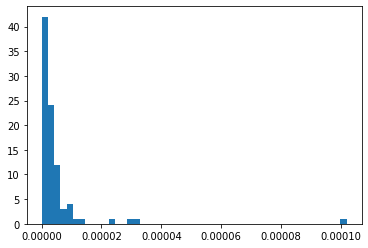

In [65]:
plt.hist(val,bins=50)

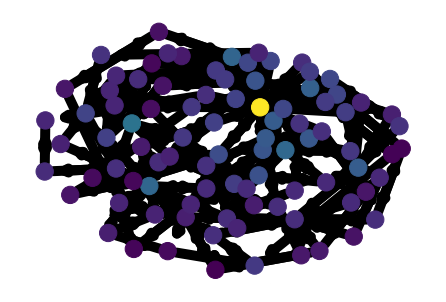

In [94]:
drawNodeWeight(subG,ppps,layout)

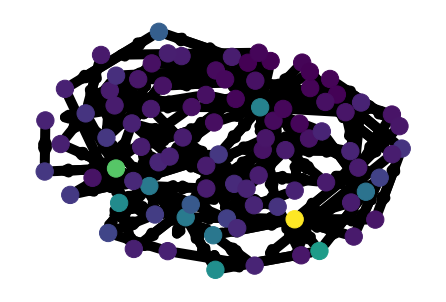

In [95]:
drawNodeWeight(subG,pppt,layout)

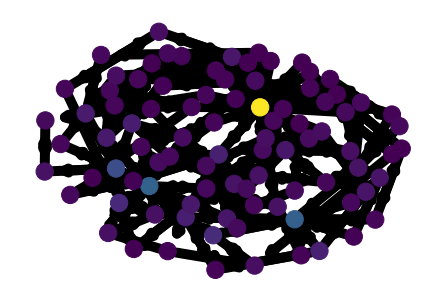

In [96]:
drawNodeWeight(subG,{i:ppps[i]*pppt[i] for i in ppps},layout)

colored Random Walk

In [30]:
nodeval=sorted([[pps[i]*ppt[i],i] for i in pps],reverse=True)
selNodeNum=9
selNode=[nodeval[i][1] for i in range(selNodeNum)]

In [31]:
selNode

[2, 1989, 497437, 1994, 1616853, 1987, 577215, 58902, 2000]

In [32]:
def coloredRandomWalk(G,selNode,maxT=20,alpha=0.5,theta=5e-9,l1=0.0,l2=0.0):
    k=len(selNode)
    s={j.GetId():[0 for i in range(k)] for j in G.Nodes()}
    for color,j in enumerate(selNode):
        s[j][color]=1
    c=s.copy()
    for i in range(maxT):
        tc={i.GetId():[0 for i in range(k)] for i in G.Nodes()} 
        for color in range(k):
            for j in c:
                if c[j][color]>theta:
                    node=G.GetNI(j)
                    for next in node.GetOutEdges():
                        pi=1/node.GetDeg()
                        pi-=sum(c[j])*l1
                        pi+=c[j][color]*(l1+l2)
                        tc[next][color]+=pi*c[j][color]
                    for next in node.GetInEdges():
                        pi=1/(node.GetInDeg()+node.GetOutDeg())
                        pi-=sum(c[next])*l1
                        pi+=c[next][color]*(l1+l2)
                        tc[next][color]+=pi*c[j][color]
        c={j:[alpha*s[j][color]+(1-alpha)*(tc[j][color]) for color in range(k)] for j in s}    
    return c



In [33]:
c=coloredRandomWalk(G,selNode)
cout={i:np.argmax(c[i]) for i in c}

In [34]:
def drawNodeColor(G,color,layout):
    nodelist=[]
    nodecolor=[]
    for node in gx:
        nodelist.append(node)
        nodecolor.append(color[node])
    nx.draw(G,pos=layout,nodelist=nodelist,node_color=nodecolor,width=10)

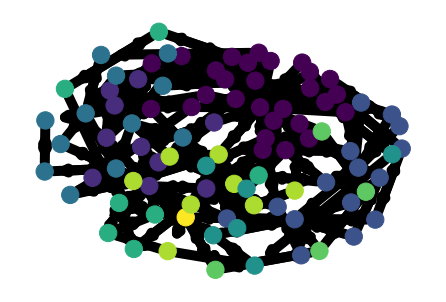

In [35]:
drawNodeColor(subG,cout,layout)

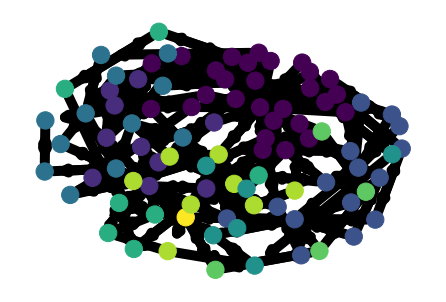

In [36]:
drawNodeColor(subG,cout,layout)

In [37]:
newsubG=nx.DiGraph()

In [38]:
newsubG.add_nodes_from(selNode)

In [39]:
for edge in G.Edges():
    src=selNode[cout[edge.GetSrcNId()]]
    dst=selNode[cout[edge.GetDstNId()]]
    newsubG.add_edge(src,dst)

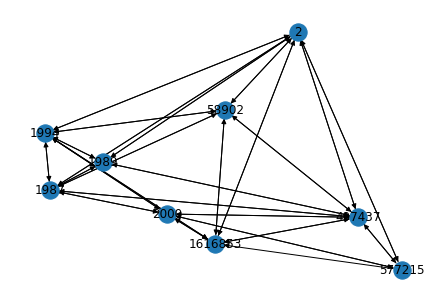

In [40]:
nx.draw(newsubG,with_labels=True,pos=layout)

independency

In [47]:
pr=G.GetPageRank()

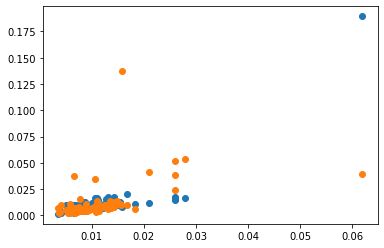

In [49]:
plt.scatter([pr[i] for i in pr],[ps[i] for i in ps])
plt.scatter([pr[i] for i in pr],[pt[i] for i in pt])

In [61]:
def randomWalk_st(G,s,k,ls,lt,alpha=0.5,reverse=False,p=None):
    if p==None:
        p={i.GetId():0 for i in G.Nodes()}
    for T in range(k):
        p[s]+=1/k
        tp={i.GetId():0 for i in G.Nodes()}
        for j in p:
            node=G.GetNI(j)
            if not reverse:
                partition=sum([alpha**(lt[j]-lt[k]) for k in node.GetOutEdges()])
                for k in node.GetOutEdges():
                    tp[k]+=p[j]*alpha**(lt[j]-lt[k])/partition
            else:
                partition=sum([alpha**(ls[j]-ls[k]) for k in node.GetOutEdges()])
                for k in node.GetInEdges():
                    tp[k]+=p[j]*alpha**(ls[j]-ls[k])/partition
        p=tp
    return p

In [63]:
ps_st=randomWalk_st(G,s,k,ls,lt)
pt_st=randomWalk_st(G,t,k,ls,lt)

In [67]:
#plt.scatter([pr[i] for i in subG.nodes],[ps_st[i] for i in subG.nodes],label="ps")
#plt.scatter([pr[i] for i in subG.nodes],[pt_st[i] for i in subG.nodes],label="pt")
plt.hist([pt_st[i]*ps_st[i]/pr[i] for i in subG.nodes],label="pst")
plt.legend()

ValueError: `bins` must increase monotonically, when an array

与spectral cluster的比较

reverse random walk

In [27]:
help(G.GetPageRank)

Help on method GetPageRank_classFn in module snap:

GetPageRank_classFn(*args, **kwargs) method of snap.PNGraph instance



In [52]:
P=nx.pagerank(subG,alpha=1,max_iter=400)

In [59]:
tp={i.GetId():0 for i in G.Nodes()}
for j in P:
    node=G.GetNI(j)
    for k in node.GetOutEdges():
        tp[k]+=P[j]/node.GetOutDeg()

In [77]:
def getPj2i(i,j):
    return 1/G.GetNI(i).GetOutDeg()*P[i]/P[j]

In [78]:
for j in G.Nodes():
    print(sum([getPj2i(i,j.GetId()) for i in j.GetInEdges()]))

1.0000608377349036
0.9999886593443061
0.9999386772000974
0.9999627480312291
1.0000339709271366
0.9998951265512005
0.99995322390085
0.9998632641151238
1.0000027226504289
1.0000007448801538
0.9999592001260341
1.0000492387532385
0.9999579327773561
1.0000409917880142
1.0000531250429916
1.0001156634893462
1.000000361633164
0.9999868822482518
1.000056606409876
0.9998574156309392
1.000026486141692
0.9997791383139192
0.9998683678671296
0.9999401175978812
0.9998825137653923
0.9998368235206548
0.9998828558789291
1.0000389627707629
1.0000322793602967
1.0000268321866952
1.0000512958394066
0.99992319824146
1.0000857054164818
1.0001040902249707
1.0000617336108992
1.000138678215983
1.0000812896629367
1.0000815671398464
1.0000801059086126
1.0000218426452696
1.0000346397223145
1.0000128371422101
1.000039051850178
1.0000472710777473
1.000050951743205
1.0001465191757437
1.0001797307061777
1.000086104743431
1.000126542408333
1.000061069654055
1.000115797972158
1.000077585564528
1.0000294822716298
1.000033

In [43]:
def randomWalk(G,s,k):
    p={i.GetId():0 for i in G.Nodes()}
    p[s]=1
    for T in range(k):
        tp={i.GetId():0 for i in G.Nodes()}
        for j in p:
            node=G.GetNI(j)
            for k in node.GetOutEdges():
                tp[k]+=p[j]/node.GetOutDeg()
        p=tp
    return p

In [81]:
def randomWalk_Reverse(G,t,k,pageRank):
    def getPj2i(i,j):
        return 1/G.GetNI(i).GetOutDeg()*pageRank[i]/pageRank[j]
    p={i.GetId():0 for i in G.Nodes()}
    p[t]=1
    for T in range(k):
        tp={i.GetId():0 for i in G.Nodes()}
        for j in p:
            node=G.GetNI(j)
            for k in node.GetInEdges():
                tp[k]+=p[j]*getPj2i(k,j)
        p=tp
    return p

In [45]:
s=2
t=2000

In [80]:
prev=randomWalk_Reverse(G,t,5,P)
for i in G.Nodes():
    i=i.GetId()
    print(prev[i]*P[t]/P[i],randomWalk(G,i,5)[t])


1.0000608377349036
0.9999886593443061
0.9999386772000974
0.9999627480312291
1.0000339709271366
0.9998951265512005
0.99995322390085
0.9998632641151238
1.0000027226504289
1.0000007448801538
0.9999592001260341
1.0000492387532385
0.9999579327773561
1.0000409917880142
1.0000531250429916
1.0001156634893462
1.000000361633164
0.9999868822482518
1.000056606409876
0.9998574156309392
1.000026486141692
0.9997791383139192
0.9998683678671296
0.9999401175978812
0.9998825137653923
0.9998368235206548
0.9998828558789291
1.0000389627707629
1.0000322793602967
1.0000268321866952
1.0000512958394066
0.99992319824146
1.0000857054164818
1.0001040902249707
1.0000617336108992
1.000138678215983
1.0000812896629367
1.0000815671398464
1.0000801059086126
1.0000218426452696
1.0000346397223145
1.0000128371422101
1.000039051850178
1.0000472710777473
1.000050951743205
1.0001465191757437
1.0001797307061777
1.000086104743431
1.000126542408333
1.000061069654055
1.000115797972158
1.000077585564528
1.0000294822716298
1.000033